# Applied Statistics Module Project Notebook

Author: Sean Humphreys

Contact: sean@cruaghgreen.com

This Jupyter Notebook contains the solutions to the project requirement for the 2024 Applied Statistics module on the ATU Mayo/Galway Higher Diploma in Science in Computing in Data Analytics.

## Contents

1. [Problem Statement](#problem-statement)

2. [Introduction](#introduction)

3. [Software Libraries](#software-libraries)

4. [Exploratory Data Analysis](#exploratory-data-analysis)

5. [Data Visualisation](#data-visualisation)

6. [t-Test](#t-test)

7. [References](#references)

## Problem Statement <a id="problem-statement"></a>

Analyze the [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv).
You will find [a short description](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html) of it on [Vicent Arel-Bundock's Rdatasets page](https://vincentarelbundock.github.io/Rdatasets/).
The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work.
In doing this you should:

1. Download and save the dataset to your repository.

2. Describe the data set in your notebook.

3. Describe what a t-test is, how it works, and what the assumptions are.

3. Perform a t-test to determine whether there is a significant difference between the two treatment groups `trt1` and `trt2`.

4. Perform ANOVA to determine whether there is a significant difference between the three treatment groups `ctrl`, `trt1`, and `trt2`.

5. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

## Introduction <a id="introduction"></a>

<img src="images/project/fly_trap.jpeg" alt="Venus Fly Trap" style="height:300px;float:right;">


The book, *An Introduction to Statistical Modelling*, is about generalized linear models as described by Neider and Wedderburn. In the book Dobson (1983), describes an experiment conducted to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions.

The plant weight, depends on one factor, growing condition, with three levels - control, treatment A and treatment B. In this case the samples are related - they are before and after measurements in the sense that two samples have had a treatment applied to them. In the experiment *..... genetically similar seeds are randomly assigned to be raised either in a nutritionally enriched environment (treatment) or under standard conditions (control) using a completely randomized experimental design* (Dobson, 1983, p9).

*A null hypothesis is a type of statistical hypothesis that proposes that no statistical significance exists in a set of given observations* (Investopedia, n.d.).

The plant experiment seeks to answer if the enriched environment made a difference to the weight of the plants. The null hypothesis (H<sub>0</sub>) is that the enriched environment made no difference to the weight of the plants. The alternative hypothesis (H<sub>a</sub>) is that the enriched environment made a difference to the weight of the plants.

This notebook describes a statistical analysis of the plant data.

## Software Libraries <a id="software-libraries"></a>

The following software packages are used in this notebook:

- [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accessed 8 Nov. 2023) - is an open-source software library for creating static, animated, and interactive visualizations in Python.

- [Pandas](https://pandas.pydata.org/) (https://pandas.pydata.org/ - last accessed 26 Sept. 2024) is an open-source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the Python programming language. A Pandas DataFrame is a dictionary like container for series objects. A DataFrame is the primary Pandas data structure.

- [SciPy](https://scipy.org/) (https://scipy.org/ - last accessed 29 Oct. 2024) provides algorithms for scientific computing in Python. SciPy is a portmanteau of Scientific Python. It is a scientific computation library that uses Numpy underneath.

- [Seaborn](https://seaborn.pydata.org/) (https://seaborn.pydata.org/ - last accessed 23 Nov. 2023) - is visualisation software that is built on *matplotlib*. It offers a high-level interface for drawing attractive and informative statistical graphics.

- [statsmodels](https://www.statsmodels.org/stable/index.html) (https://www.statsmodels.org/stable/index.html - last accessed 28 Nov. 2024) - is a module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [21]:
# import the required software libraries in the order they are used in the notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.power as smp

## Exploratory Data Analysis <a id="exploratory-data-analysis"></a>

**Describe the data set in your notebook.**

The dataset is read in as a CSV (*comma separated value*) file using the *pandas* ```pd.read_csv()``` method. The data is stored in a *pandas dataframe*.

[pd.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv) - accessed 17th Nov. 2024.

In [2]:
data = pd.read_csv('datasets/plant_growth.csv')

The resulting *dataframe* consists of 30 rows of data with three columns.

[DataFrame.shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas-dataframe-shape) - accessed 17th Nov. 2024

In [3]:
data.shape

(30, 3)

The pandas ```info()``` method is used to display information about the dataset - the data-types, the number of non-null values and the columns. The dataset has consists of three columns - *"rownames", "weight" and "group"*. The *weight* variable corresponds to the weight of the samples. The *group* variable identifies the group to which the weight results belong to. 

[pd.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas-dataframe-info) - accessed 17th Nov. 2024

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


The ```isna()``` and the ```sum()``` methods are chained to count the number of missing values in the dataset. As demonstrated there are no missing values.

[pd.isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna) - accessed 23rd Nov. 2024

[pd.sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html#pandas-dataframe-sum) - accessed 23rd Nov. 2024

In [5]:
# https://www.aporia.com/resources/how-to/count-nan-values-dataframe/
# accessed 17th Nov. 2024
data.isna().sum()

rownames    0
weight      0
group       0
dtype: int64

The ```value_counts()``` method in *pandas* is used to display the number of unique values in the *group* columns of the dataset. The group column consists of three categorical variables - "ctrl", "trt1" and "trt2".

[pd.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html#pandas-series-value-counts) - accessed 23 Nov. 2024

In [6]:
data['group'].value_counts()

group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64

The *pandas* ```head()``` and ```tail()``` functions display the first and last five rows odf the *dataframe*.

[pd.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas-dataframe-head) - accessed 17th Nov. 2025

[pd.tail()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas-dataframe-tail) - accessed 17th Nov. 2025

In [7]:
data.head(5)

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [8]:
data.tail(5)

,rownames,weight,group
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


Inspecting the first and last five rows of the dataset indicates that that the weight variable is a numerical variable that is continuous.

Variable classification determines the type of analysis that can be carried out on that variable. The graphic below summarises the types of data and how they can be analysed.

**Variable Classification Summary Table** (Summarised from Sharma, 2020)

![data_classification](images/project/data_categories_18102023_sh.png "Data Classification")

Each category group of results in the dataset can be assigned to separate datasets using the pandas `iloc()` method. The `iloc()` method allows for selection of specific rows and columns by providing integer indices.

[pd.iloc()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) - accessed 28th Nov. 2024.

In [9]:
ctrl = data.iloc[0:10]
trt1 = data.iloc[10:20]
trt2 = data.iloc[20:]

The *pandas* ```describe()``` prints descriptive statistics including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. Using this method allows for inspection of descriptive statistics on each group within the dataset. Examining the outputs of this method highlights that each of the three groups have different mean and median values suggesting that the three groups are in fact different. However, these results do not answer whether or not the three groups differ significantly from a statistical perspective. Also of note is that the standard deviation for each group are very close in value.

[pd.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas-dataframe-describe) - accessed 17th Nov. 2024

In [10]:
ctrl.describe()

,rownames,weight
count,10.00000,10.000000
mean,5.50000,5.032000
std,3.02765,0.583091
min,1.00000,4.170000
25%,3.25000,4.550000
50%,5.50000,5.155000
75%,7.75000,5.292500
max,10.00000,6.110000


In [11]:
trt1.describe()

,rownames,weight
count,10.00000,10.000000
mean,15.50000,4.661000
std,3.02765,0.793676
min,11.00000,3.590000
25%,13.25000,4.207500
50%,15.50000,4.550000
75%,17.75000,4.870000
max,20.00000,6.030000


In [12]:
trt2.describe()

,rownames,weight
count,10.00000,10.000000
mean,25.50000,5.526000
std,3.02765,0.442573
min,21.00000,4.920000
25%,23.25000,5.267500
50%,25.50000,5.435000
75%,27.75000,5.735000
max,30.00000,6.310000


## Data Visualisation <a id="data-visualisation"></a>

The "fivethirtyeight" plot stye sheet is applied which tries to replicate the styles from [https://abcnews.go.com/538](https://abcnews.go.com/538) (last accessed 16. Oct 2024).

In [13]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html 
# [Accessed 6 Dec. 2023]
plt.style.use('fivethirtyeight')

# set the default size for plots
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib [Accessed 21 Oct. 2024]
plt.rcParams["figure.figsize"] = (10,5)

#define a color palette
palette=['#ff595e', '#8ac926', '#1982c4']

The distribution of the data is visualised with the Seaborn ```histplot()``` method. The small sample sizes (n=10) for each group it is difficult to tell how the results are distributed. How the data is distributed will have an impact on the type of statistical analysis that cna be carried out on the results in the dataset.

[sns.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn-histplot) - accessed 17th Nov. 2024.

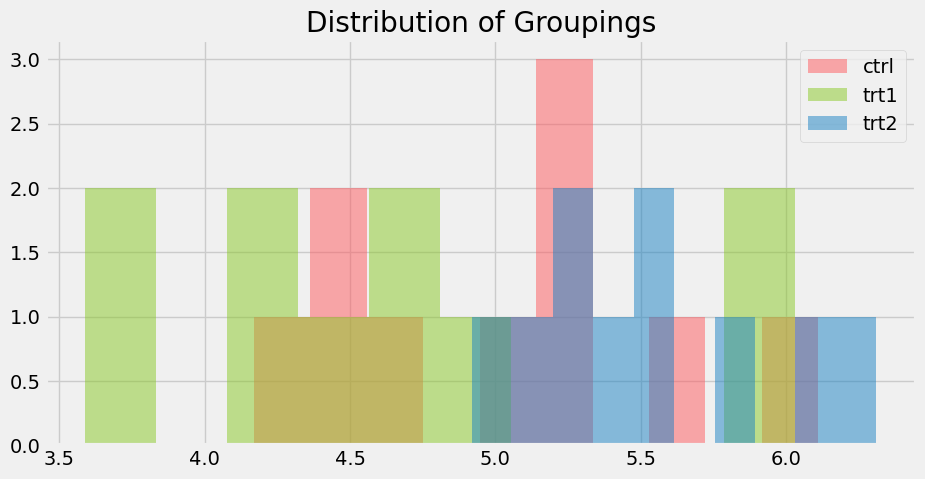

In [14]:
# create an empty plot
fig, ax = plt.subplots()

# plot the data
ax.hist(ctrl['weight'], alpha=0.5, color='#ff595e', label='ctrl')
ax.hist(trt1['weight'], alpha=0.5, color='#8ac926', label='trt1')
ax.hist(trt2['weight'], alpha=0.5, color='#1982c4', label='trt2')

# annotate the plot
ax.legend()
ax.set_title('Distribution of Groupings')

# show
plt.show()

Separating out the distribution for each group allows a clearer visualisation of the spread of each group of results but does not give any deep insight into the data.

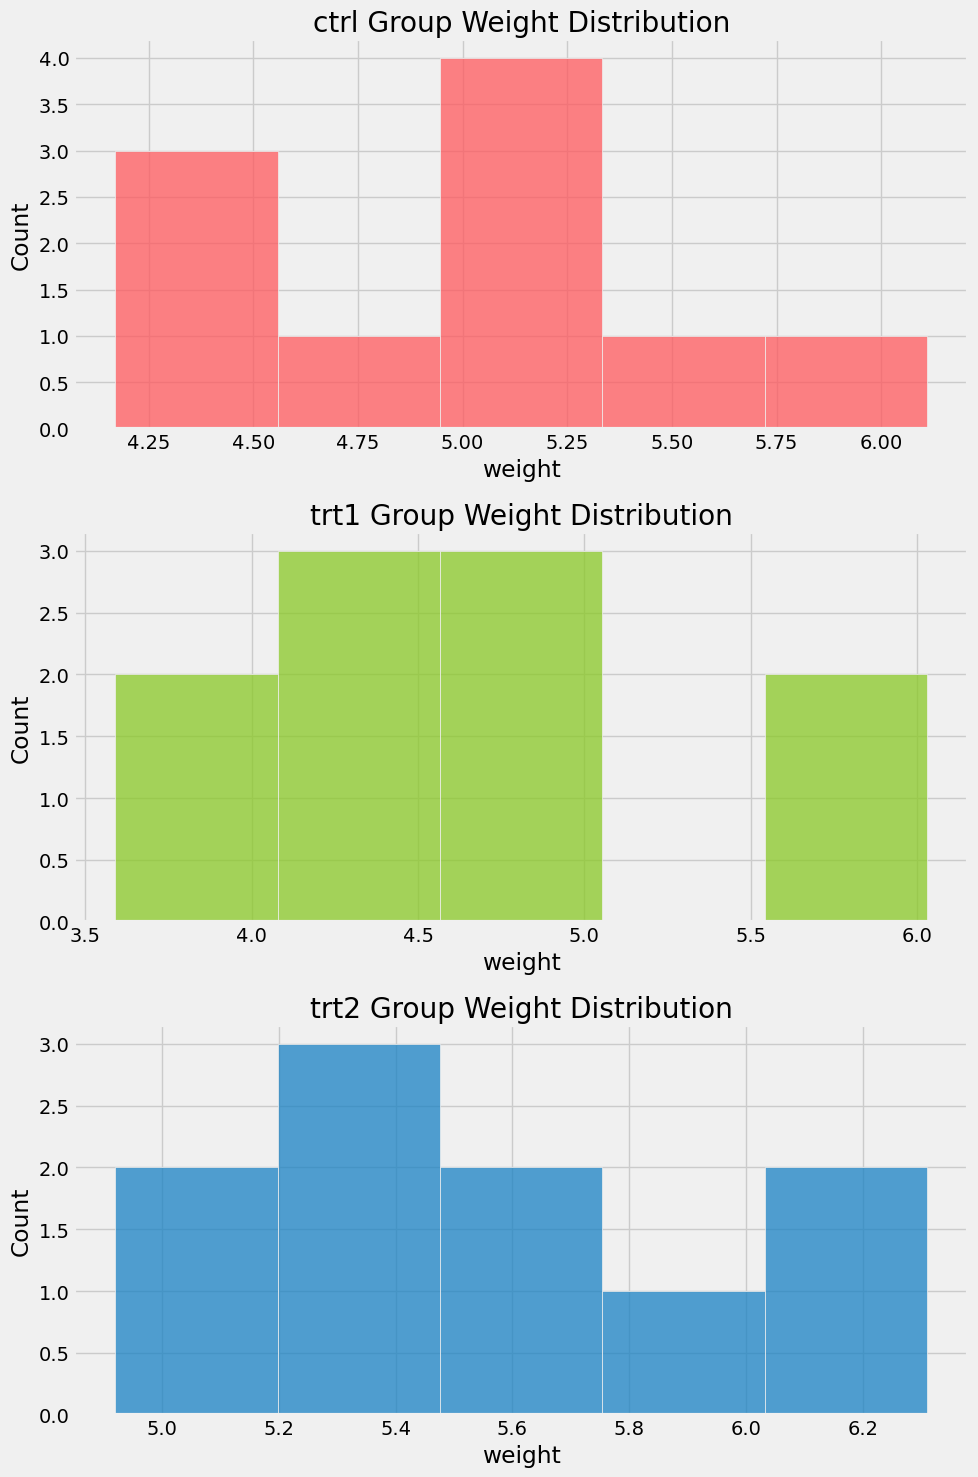

In [15]:
# create an empty plot.
fig, ax = plt.subplots(3, 1, figsize=(10,15))

# plot the data
sns.histplot(data=ctrl, x=ctrl['weight'], ax=ax[0], color='#ff595e').set_title('ctrl Group Weight Distribution')
sns.histplot(data=ctrl, x=trt1['weight'], ax=ax[1], color='#8ac926').set_title('trt1 Group Weight Distribution')
sns.histplot(data=ctrl, x=trt2['weight'], ax=ax[2], color='#1982c4').set_title('trt2 Group Weight Distribution')

# display the plot
plt.tight_layout()
plt.show()

A Shapiro-Wilk statistical test can be performed on the data to accept the null hypothesis that the data is normally distributed. A test statistic close to one indicates that the data is likely to be normally distributed and a helps determine to reject or accept the null hypothesis (Humaizi, 2024). A common P-Value threshold is 0.05%. If the P-Value is greater than this threshold the null hypothesis is accepted.

The Shapiro-Wilk test can be performed using the `shapiro()` function from the *scipy* library. Performing the Shapiro-Wilk test on each of the groups in the dataset confirms the null hypothesis that the groups are normally distributed the test statistic is close to one and the p-value is greater than 0.05% for each group of weights.

[stats.shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro) - accessed 28th Nov. 2024.

In [16]:
stats.shapiro(ctrl['weight'])

ShapiroResult(statistic=0.9566814905276368, pvalue=0.7474734451902585)

In [17]:
stats.shapiro(trt1['weight'])

ShapiroResult(statistic=0.9304106932921845, pvalue=0.45194395810927823)

In [18]:
stats.shapiro(trt2['weight'])

ShapiroResult(statistic=0.9410051970546394, pvalue=0.5642518926711526)

A boxplot *".....is a graph that shows the dispersion and central tendency of a dataset using a five number summary"* (Statistics How To, 2018). Boxplots demonstrate the maximum, minimum, median, outlier and interquartile range for the given dataset.

Detailed information on how to read and interpret boxplots can be found at https://wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots [last accessed 14th Nov. 2025].

Boxplots of each of the groups in the dataset confirms that each group has a different mean and median. Once again the question remains to be answered if these differences are statistically different.

In [19]:
# visualise the mean on boxplot
#  based on code from - https://www.statology.org/seaborn-boxplot-mean/
meanprops={'marker':'o', 'markerfacecolor':'white', 
           'markeredgecolor':'black', 'markersize':'8'}

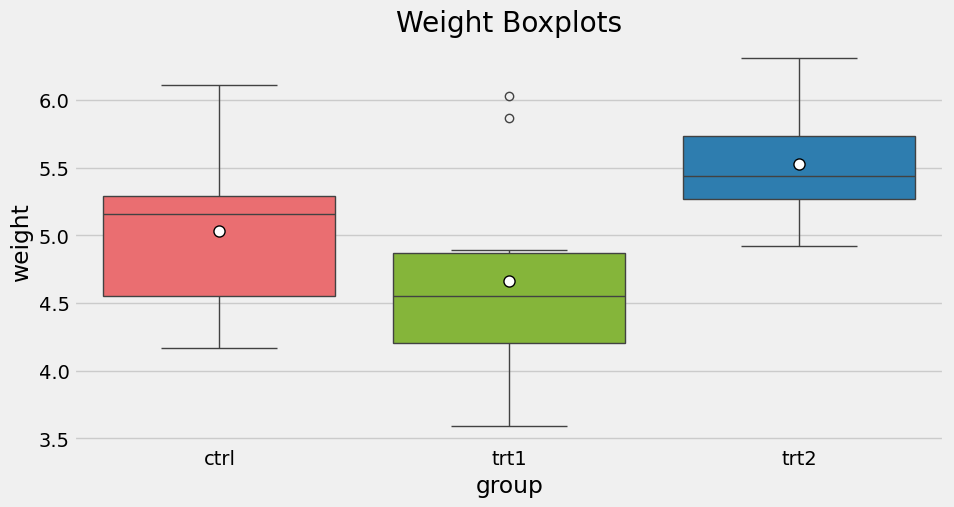

In [20]:
# create an empty plot.
fig, ax = plt.subplots()

# plot the data
sns.boxplot(data=data, y=data['weight'], x='group', hue='group', 
            palette=palette, showmeans=True, meanprops=meanprops).set_title('Weight Boxplots')

# show the results
plt.show()

## t Test <a id="t-test"></a>

<img src="images/task_3/william_sealy_gosset.jpg" alt="William Sealy Gosset" style="height:300px;float:right;">

An employee in the Guinness brewery (St. Jame's Gate Dublin), William Sealy Gosset (pictured), first published t-Tests in 1908 in the scientific journal Biometrika using the pseudonym "Student" (Wikipedia Contributors, 2019). Gosset found that existing statistical techniques using large samples were not useful for the small sample sizes that he encountered in his work (Britannica, 2019).

<i>Imaged sourced https://en.wikipedia.org/wiki/Student%27s_t-test</i>

**Question - What is a t-Test?**

**Answer** - A t-Test, also known as the *Student’s t-test*, is a method of testing hypotheses about the mean of a small sample drawn from a normally distributed population when the population standard deviation is unknown (Britannica, 2019). t-tests are used to compare sample populations and infer conclusions about the larger population (builtin.com, n.d.). For tests involving the mean of a sample of size greater than 30 the normal distribution is usually applied (Britannica, 2019).

There are two types of t-Tests:

+ Independent t-Tests - compares the means between two unrelated groups on the same continuous, dependent variable (Laerd Statistics, 2018)

+ The dependant t-test also called a paired t-Test - case where the samples are related, such as repeated measures on the same population (Brownlee, 2018)

**Question - How does a t-Test work?**

**Answer** - The test works by checking the means from two samples to see if they are significantly different from each other (Brownlee, 2018). It does this by calculating the standard error in the difference between means, which can be interpreted to see how likely the difference is, if the two samples have the same mean (the null hypothesis) (ibid.).

**Question - What are the t-Test assumptions?**

**Answer** - The following assumptions with respect to t-Tests are described by Maverick (2021).

**1.** The scale of measurement applied to the data collected follows a continuous or ordinal scale.

From exploratory data analysis carried out above, the *weight* variable in the dataset is confirmed as a continuous variable.

**2.** The data is collected from a representative, randomly selected portion of the total population. 

Dobson(1983) confirms that genetically similar seeds are randomly assigned to be raised either in a nutritionally enriched environment (treatment) or under standard conditions (control) using a completely randomized experimental design.

**3.** The data, when plotted, results in a normal distribution, bell-shaped distribution curve.

The Shapiro-Wilk test confirms that the data for each group (*ctrl, trt1 & trt2*) are normally distributed.

**4.** A reasonably large sample size is used. A larger sample size means the distribution of results should approach a normal bell-shaped curve.

The word *reasonable* is subjective. As per Zach (2021) there is no minimum size for performing a t-Test and that the first t-Test had a sample size of four. If the sample size is too small then the power of the test could be too low to detect meaningful differences in the data (ibid). Without a definition of *reasonable sample size* one cannot say that a sample size of 10 meets the requirement for this assumption other.

Statistical power refers to the probability that a test will detect some effect when there actually is one. It can be shown that the lower the sample size used, the lower the statistical power of a given test. The effect of the sample size is explored further in the next section.

**5.** Equal variance exists when the standard deviations of samples are approximately equal.

From the exploratory data analysis performed on the dataset the standard deviations of the samples in the dataset have been shown to be approximately equal.

**Question** - Perform a t-test to determine whether there is a significant difference between the two treatment groups `trt1` and `trt2`.

**Answer**

As the measures on the groups *trt1* and *trt2* are not repeated measures on the same population an independent t-Test is the appropriate t-Test to carry out in this situation.

## References <a id="references"></a>

Britannica (2019). Student’s t-test | statistics. In: Encyclopædia Britannica. [online] Available at: https://www.britannica.com/science/Students-t-test. [Accessed 14th Nov 2024].

Brownlee, J. (2018). How to Code the Student’s t-Test from Scratch in Python. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/. [Accessed 18th Nov. 2024]

builtin.com. (n.d.). How to Do a T-Test in Python | Built In. [online] Available at: https://builtin.com/data-science/t-test-python. [Accessed 14th Nov 2024].

Dobson, A.J. (1983). Introduction to Statistical Modelling. Springer US.

Humaizi, A. (2024). 10.0 Shapiro-Wilk test - Ahmad Humaizi - Medium. [online] Medium. Available at: https://medium.com/@maizi5469/10-0-shapiro-wilk-test-5be38fd3c2a6. [Accessed 29 Oct. 2024].

Investopedia. (n.d.). Null Hypothesis: What Is It and How Is It Used in Investing? [online] Available at: https://www.investopedia.com/terms/n/null_hypothesis.asp#toc-what-is-a-null-hypothesis. [Accessed 18th Oct. 2024].

Khryplyvyi, A. (2022). How to Count the NaN Values in a DataFrame. [online] Aporia. Available at: https://www.aporia.com/resources/how-to/count-nan-values-dataframe/ [Accessed 26 Sep. 2024].

Kim, S. (2022). Create Jupyter Notebook that runs everywhere. [online] Medium. Available at: Create Jupyter Notebook that runs everywhere [Accessed 26 Sep. 2024].

Laerd Statistics (2018). Independent t-test in SPSS Statistics - Procedure, output and interpretation of the output using a relevant example | Laerd Statistics. [online] Laerd.com. Available at: https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php. [Accessed 18th Nov. 2024].

Matplotlib (2012). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/. [Accessed 17th. Nov. 2024].

Maverick, J.B. (2021). What assumptions are made when conducting a t-test? [online] Investopedia. Available at: https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp. [Accessed 14th Nov 2024].

pandas.pydata.org. (n.d.). pandas documentation — pandas 1.0.3 documentation. [online] Available at: https://pandas.pydata.org/docs/index.html. [Accessed 17th Nov. 2024].

SciPy (2020). SciPy.org — SciPy.org. [online] Scipy.org. Available at: https://scipy.org/. [Accessed 28th Nov. 2024].

seaborn (2012). seaborn: statistical data visualization — seaborn 0.9.0 documentation. [online] Pydata.org. Available at: https://seaborn.pydata.org/. [Accessed 17th Nov. 2024].

Statistics How To (2018). Box Plot (Box and Whiskers): How to Read One & How to Make One in Excel, TI-83, SPSS - Statistics How to. [online] Statistics How to. Available at: https://www.statisticshowto.com/probability-and-statistics/descriptive-statistics/box-plot/. [Accessed 28th Noc 2024].

Sharma, R. (2020). 4 Types of Data: Nominal, Ordinal, Discrete, Continuous. [online] upGrad blog. Available at: https://www.upgrad.com/blog/types-of-data/. [Accessed 17 Nov. 2023].

Wikipedia Contributors (2019). Student’s t-test. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Student%27s_t-test. [Accessed 14th Nov 2024].

Zach (2021). The Minimum Sample Size for a t-test: Explanation & Example. [online] Statology. Available at: https://www.statology.org/minimum-sample-size-for-t-test/. [Accessed 14th Nov 2024].

---

Notebook ends.